# College Data Exploration and Regression

Coded by Luna McBride

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #Plotting
%matplotlib inline

from sklearn.model_selection import train_test_split #Split the data into train and test
from sklearn.ensemble import RandomForestRegressor #Forest for regression
from sklearn.metrics import mean_squared_error #Error testing

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-college-data/College_Data.csv


In [2]:
college = pd.read_csv("../input/us-college-data/College_Data.csv") #Load the college data into a dataframe
college.head() #Take a peek at the data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


---

# Fix the Column Names

In [3]:
#Names to rename the columns to
newNames = ["collegeName", "isPrivate", "numApps", "numAccept", "numEnroll", "top10Stud", "top25Stud", "fulltime",
            "parttime", "outstateCost", "roomCost", "bookCost", "personalCost", "teachWithPHD", "teachWithTerminal",
           "studFacRatio", "alumWhoDonate%", "expendPerStud", "gradRate"]

oldNames = college.columns #Get the old columns
nameCombos = dict(zip(oldNames, newNames)) #Combine the old and new into a dictionary
college = college.rename(columns = nameCombos) #Rename the columns
college.head() #Take a peek at the dataset

,collegeName,isPrivate,numApps,numAccept,numEnroll,top10Stud,top25Stud,fulltime,parttime,outstateCost,roomCost,bookCost,personalCost,teachWithPHD,teachWithTerminal,studFacRatio,alumWhoDonate%,expendPerStud,gradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


---

# Check for Null Values

In [4]:
print(college.isnull().any()) #Check for null values

collegeName          False
isPrivate            False
numApps              False
numAccept            False
numEnroll            False
top10Stud            False
top25Stud            False
fulltime             False
parttime             False
outstateCost         False
roomCost             False
bookCost             False
personalCost         False
teachWithPHD         False
teachWithTerminal    False
studFacRatio         False
alumWhoDonate%       False
expendPerStud        False
gradRate             False
dtype: bool


There are no null values.

---

# Create New Fields

## Overall Cost

In [5]:
#GetOverallCosts: Calculates the overall costs based on all cost fields in the dataset (out of state only, there is no in state)
#Input: the college dataframe
#Output: all overall cost values
def getOverallCost(df):
    overallCost = [] #Create a list to hold the overall costs
    
    #For each column, get the college's overall costs
    for index, row in df.iterrows():
        #print(row)
        overallCost.append(row[9] + row[10] 
        + row[11] + row[12]) #Append the sum of all cost fields
        
    return overallCost #Return the list of overall costs
        
college["overallCost"] = getOverallCost(college) #Fill overall costs
college.head() #Take a peek at the dataset

,collegeName,isPrivate,numApps,numAccept,numEnroll,top10Stud,top25Stud,fulltime,parttime,outstateCost,roomCost,bookCost,personalCost,teachWithPHD,teachWithTerminal,studFacRatio,alumWhoDonate%,expendPerStud,gradRate,overallCost
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,13390
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,20980
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,16565
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,19735
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,13980


## Acceptance Rate

In [6]:
college["acceptRate"] =  round(college["numAccept"] / college["numApps"], 2) #Get the acceptance rate
college.head() #Take a peek at the dataset

,collegeName,isPrivate,numApps,numAccept,numEnroll,top10Stud,top25Stud,fulltime,parttime,outstateCost,...,bookCost,personalCost,teachWithPHD,teachWithTerminal,studFacRatio,alumWhoDonate%,expendPerStud,gradRate,overallCost,acceptRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,13390,0.74
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,20980,0.88
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,16565,0.77
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,19735,0.84
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,13980,0.76


## Set Index as Institutions

In [7]:
college = college.set_index("collegeName") #Set the names to the index
college.head() #Take a peek at the data

,isPrivate,numApps,numAccept,numEnroll,top10Stud,top25Stud,fulltime,parttime,outstateCost,roomCost,bookCost,personalCost,teachWithPHD,teachWithTerminal,studFacRatio,alumWhoDonate%,expendPerStud,gradRate,overallCost,acceptRate
collegeName,,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,13390,0.74
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,20980,0.88
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,16565,0.77
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,19735,0.84
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,13980,0.76


---

# Data Exploration

I am also only limiting the fields to a couple entries, as this is to show how the data is structured. It is hard to see that when all colleges are in the image (just by the sheer number)

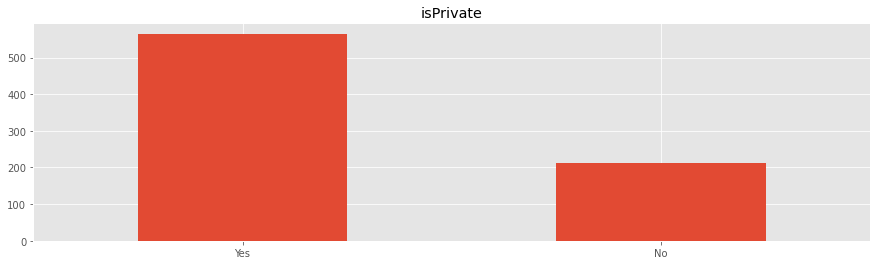

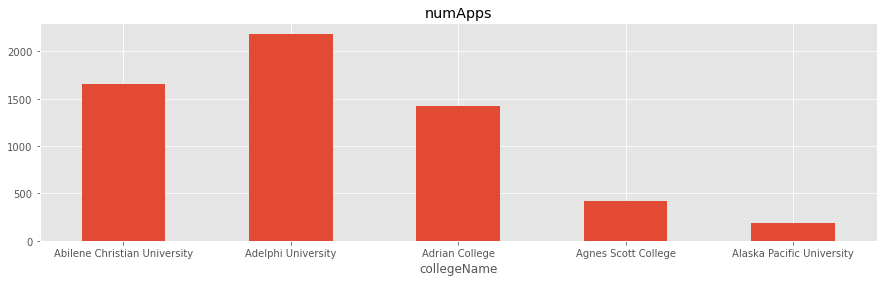

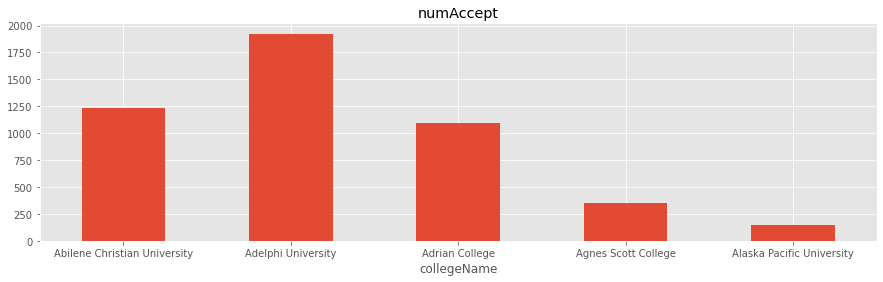

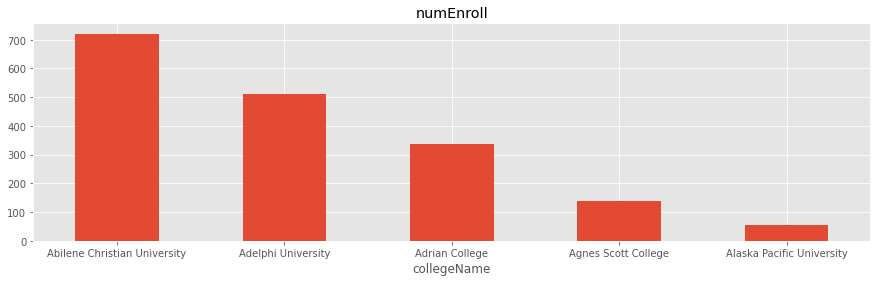

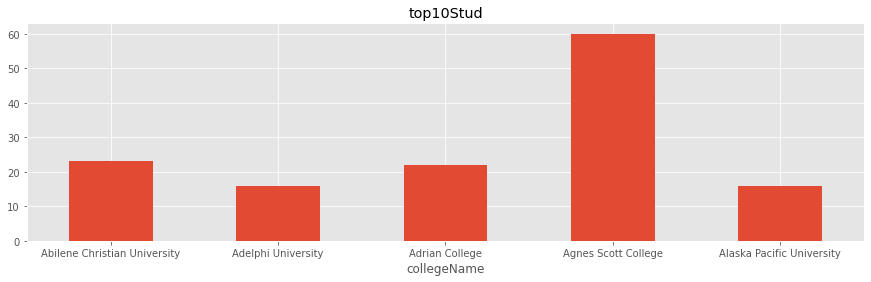

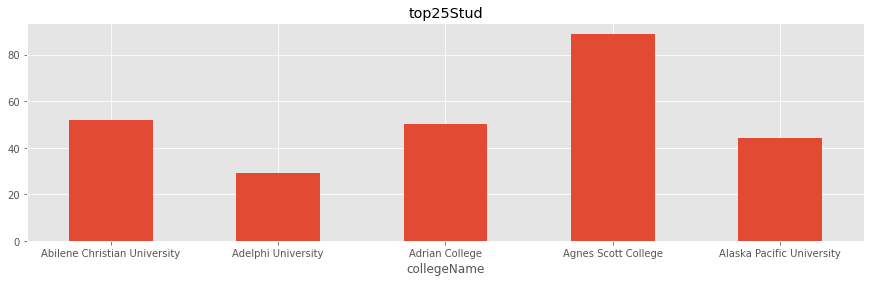

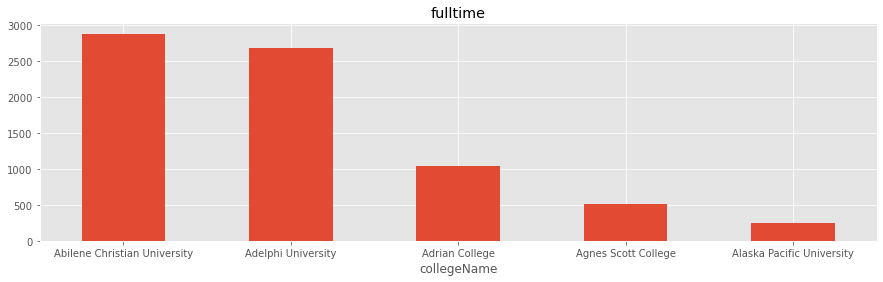

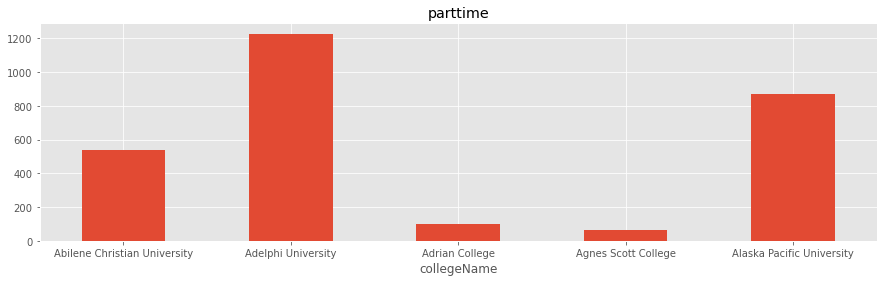

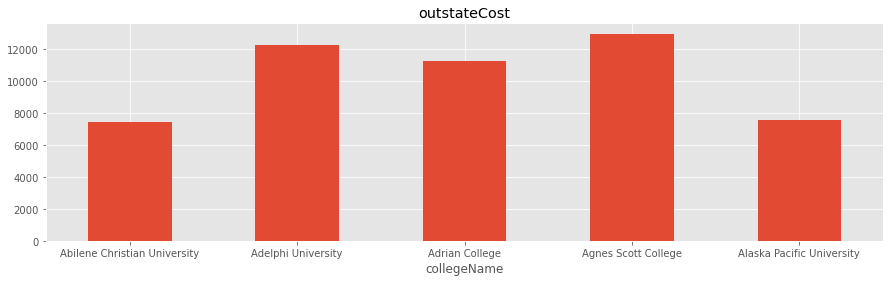

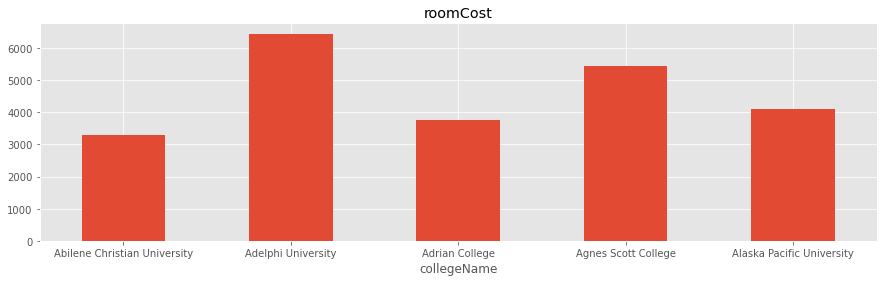

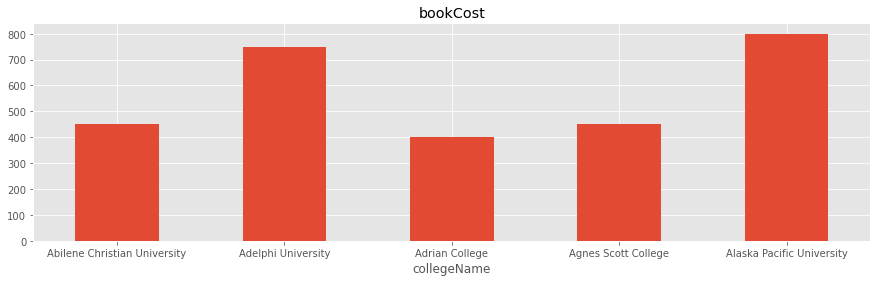

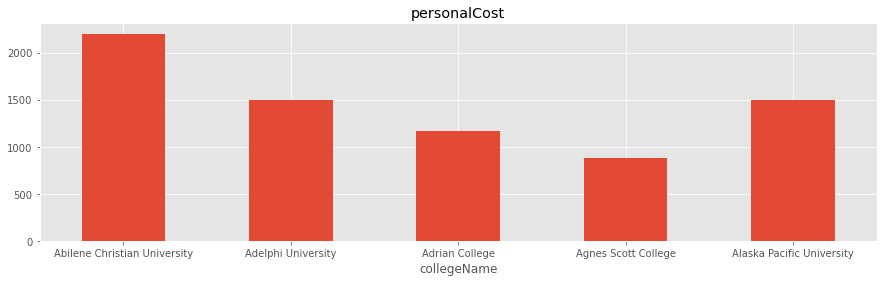

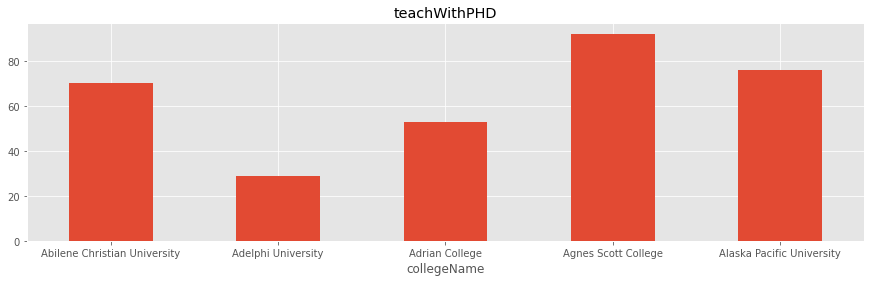

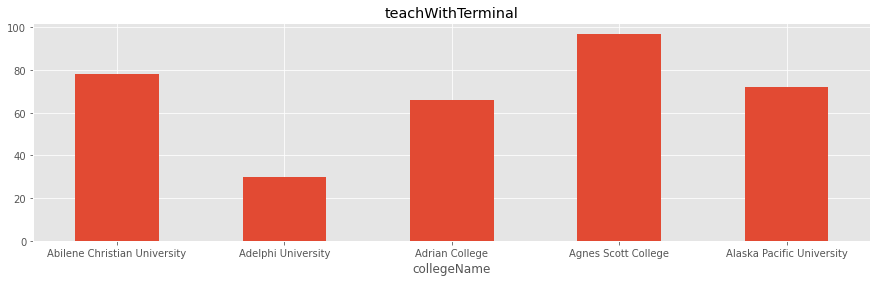

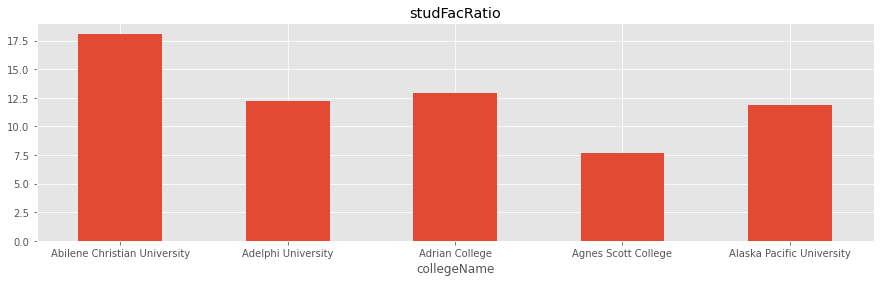

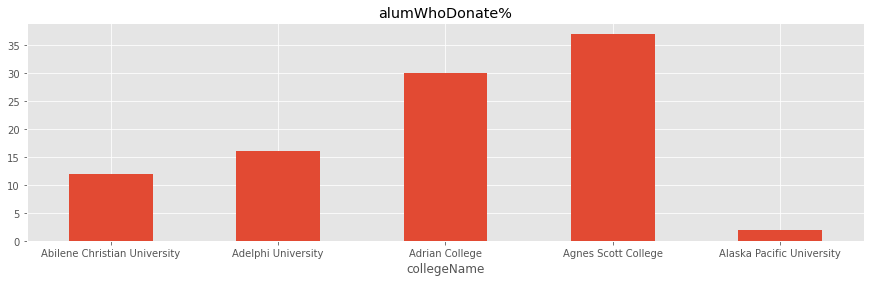

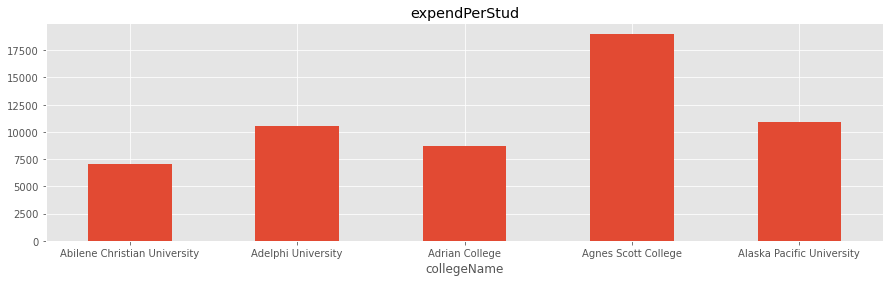

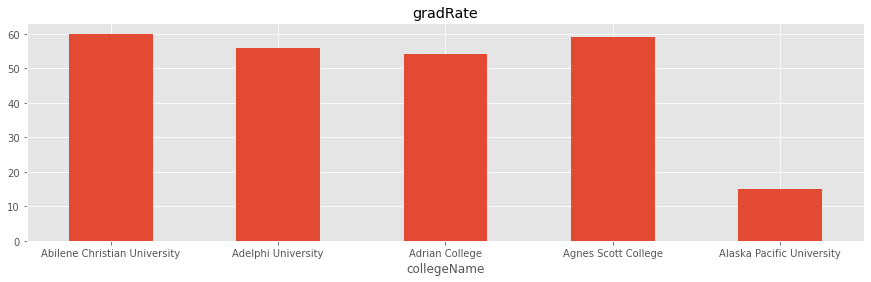

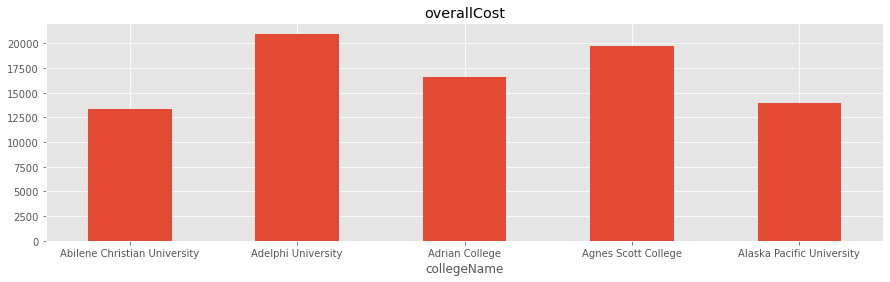

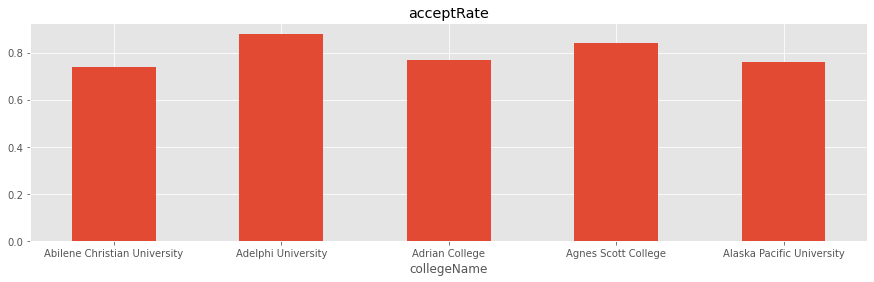

In [8]:
plt.rcParams['figure.figsize'] = (15,4) #Set the figure size

#For every column in the college dataset, plot a graph with a few entries
for column in college:
    
    #If the column is one of the numeric columns
    if column != "collegeName" and column != "isPrivate":
        col = college[column][:5] #Get the information for this column for the first few colleges
        plt.figure() #Pull the figure so they plot on separate graphs
        col.plot.bar(title = column, rot = 0) #Plot the column
        
    #If the column is "isPrivate", the boolean column. This one needs to be aggregated with the value_counts function.
    elif column == "isPrivate":
        col = college[column] #Get the information for this column
        plt.figure() #Pull the figure so it plots on separate graphs
        col.value_counts().plot.bar(title = column, rot = 0) #Plot the column, aggregating for the no/yes values

In [9]:
#For each college, print the available ranges for the columns
for column in college:
    
    #If the column is not "isPrivate", since we are looking specifically at the numeric columns
    if column != "isPrivate":
        col = college[column] #Pull the data for the column
        maxx = max(col) #Take the max value of the column
        minn = min(col) #Take the min value of the column
        print("The values for the {} column range from {} to {}".format(column, minn, maxx)) #Print the ranges

The values for the numApps column range from 81 to 48094
The values for the numAccept column range from 72 to 26330
The values for the numEnroll column range from 35 to 6392
The values for the top10Stud column range from 1 to 96
The values for the top25Stud column range from 9 to 100
The values for the fulltime column range from 139 to 31643
The values for the parttime column range from 1 to 21836
The values for the outstateCost column range from 2340 to 21700
The values for the roomCost column range from 1780 to 8124
The values for the bookCost column range from 96 to 2340
The values for the personalCost column range from 250 to 6800
The values for the teachWithPHD column range from 8 to 103
The values for the teachWithTerminal column range from 24 to 100
The values for the studFacRatio column range from 2.5 to 39.8
The values for the alumWhoDonate% column range from 0 to 64
The values for the expendPerStud column range from 3186 to 56233
The values for the gradRate column range from 

In [10]:
print(college.loc[college["gradRate"] > 100]) #Show where the graduation rate is greater than 100

                  isPrivate  numApps  numAccept  numEnroll  top10Stud  \
collegeName                                                             
Cazenovia College       Yes     3847       3433        527          9   

                   top25Stud  fulltime  parttime  outstateCost  roomCost  \
collegeName                                                                
Cazenovia College         35      1010        12          9384      4840   

                   bookCost  personalCost  teachWithPHD  teachWithTerminal  \
collegeName                                                                  
Cazenovia College       600           500            22                 47   

                   studFacRatio  alumWhoDonate%  expendPerStud  gradRate  \
collegeName                                                                
Cazenovia College          14.3              20           7697       118   

                   overallCost  acceptRate  
collegeName                               

In [11]:
print(college.loc[college["acceptRate"] == 1]) #Print the colleges with 100% acceptance rates

                                 isPrivate  numApps  numAccept  numEnroll  \
collegeName                                                                 
Arkansas Tech University                No     1734       1729        951   
Emporia State University                No     1256       1256        853   
Mayville State University               No      233        233        153   
MidAmerica Nazarene College            Yes      331        331        225   
Southwest Baptist University           Yes     1093       1093        642   
University of Wisconsin-Superior        No      910        910        342   
Wayne State College                     No     1373       1373        724   

                                  top10Stud  top25Stud  fulltime  parttime  \
collegeName                                                                  
Arkansas Tech University                 12         52      3602       939   
Emporia State University                 43         79      3957       5

The number of applicants range from 81 to 48094 for the period presented, meaning there are both large and small colleges within this dataset. The min and max values for the Acceptance and Enrollment columns are both less than the number of applications, which makes sense given that the colleges will not accept everyone. 

Top10Stud and Top25Stud, representing students from top high schools, make up a small number of applicants to each college. This means that they are usually applying to colleges besides those in this dataset.  

Fulltime and Parttime minimums add up to lower than the lowest total number of applicants, which tells me this is for the college as a whole rather than just incoming students. Both of these values range from small numbers to huge numbers, which tells me that there is dataset holds various colleges that can fit different lifestyles. 

The cost metrics (roomCost, outstateCost, bookCost, and personalCost) here are added together into the overallCost field. There is no in state tuition listed, so the overallCost goes off the assumption that this is the base cost. The dataset does not say whether this cost is yearly or by semester, so I will assume this is a semester tuition by using knowledge of US college prices.
These cost columns come together to an overall range of 6604-29095, which is not really all too crazy in the context of US colleges, sadly. These are actually closer to what is considered affordably in this context, which is actually pretty impressive.

Teachers with terminal degrees/PHD's have some pretty strong ranges here, especially when student to faculty ratios are considered. There is no field here for total teacher numbers, so it is hard to compute the percentage of well educated teachers. Terminal degree teachers do not necessarily mean good teachers, but it can be said that these colleges have some knowledgeable teachers with some pretty direct teaching methods.

The percent of alumni who donate range from 0% to 64%. I should stress is not inherently necessary, as donations are entirely voluntary. Yet, at most 64% of people decided their education was good enough to donate to the college so they can continue to educate. Of course this could be a school culture issue like with places like Harvard, but this is an interesting thing to note nonetheless.

Expenditure per student has a pretty big range here, but this does not necessarily point to good or bad schools. The interesting thing is that this range has both a minimum lower and a maximum higher than the overall cost metric. This means that some schools spend more on their students than what the students are paying, while others are putting less into the students than what they are paying (likely keeping the rest for other projects or profit).

The graduation rate here is strange, since it ranges from 10 to 118 percent. This is quite odd, since what does a 118% graduation rate mean? Are there more people graduating than are enrolled?
Some further digging showed that only Cazenovia College had a rate above 100%, meaning this one specifically either had an error or might be incorrectly reporting their rates for some unknown reason.

Acceptance rates range from 15% to 100%. A smaller rate is not necessarily bad, given that schools like Harvard have acceptance rates in the single digits. The 100% acceptance rate is a bit weird, though, meaning they have no true filter on who gets in.

---

# Regression for Acceptance Rate

In [12]:
#GetChara: Get the most important characteristics to the regression
#Input: the characteristics, the model
#Output: None
def getChara(characteristics, forest):
    attributes = characteristics.columns #Get the tested attributes
    attributes = list(zip(attributes, forest.feature_importances_)) #Zip the attributes together with their coefficient
    sortAtt = sorted(attributes, key = lambda x: x[1], reverse = True) #Sort the zipped attributes by their coefficients

    print("According to the Random Forest, the most important factors for acceptance are: ") #Start printing the most important labels
    i = 0 #Counter variable so only the top five are printed

    #For each attribute in the sorted attributes
    for label, coef in sortAtt:
        if i < 5: #If there has not been five printed yet
            print(label) #Print the label as an important factor
        i += 1 #Increase i by 1

#AcceptanceRegression: Get an idea of what goes into the acceptance rate
#Input: The dataframe for the colleges
#Output: None
def acceptanceRegression(college):
    accept = college["acceptRate"].copy() #Get the acceptance rate for our regression

    characteristics = college.drop(columns = {"acceptRate"}).copy() #Get the characteristics used for the regression
    characteristics = pd.get_dummies(characteristics) #Pad non-numeric characteristics
    
    charaTrain, charaTest, accTrain, accTest = train_test_split(characteristics, accept, test_size = 0.1) #Split the dataset
    
    forest = RandomForestRegressor(n_estimators = 100) #Build a forest
    forest.fit(charaTrain, accTrain) #Fit the forest model
    
    predict = forest.predict(charaTest) #Get a list of predictions
    
    print("Forest Accuracy: ", forest.score(charaTest, accTest)) #Print the accuracy
    print("Root Mean Square Error: ", np.sqrt(mean_squared_error(accTest, predict))) #Print the root mean square error
    
    getChara(characteristics, forest) #Get the important Characteristics

In [13]:
col = college.drop(columns = {"numAccept", "numEnroll"}) #Remove the number accepted, since the number accepted of course correlates to the rate

#Run the regression a few times to show variance
for i in range(0,5):
    acceptanceRegression(col) #Perform the regression

Forest Accuracy:  0.5633736046420708
Root Mean Square Error:  0.10002231866323254
According to the Random Forest, the most important factors for acceptance are: 
top10Stud
top25Stud
numApps
outstateCost
fulltime
Forest Accuracy:  0.4556619936973141
Root Mean Square Error:  0.10473949246607647
According to the Random Forest, the most important factors for acceptance are: 
top10Stud
numApps
top25Stud
outstateCost
fulltime
Forest Accuracy:  0.3413847942872118
Root Mean Square Error:  0.11352793906663658
According to the Random Forest, the most important factors for acceptance are: 
top10Stud
numApps
top25Stud
outstateCost
gradRate
Forest Accuracy:  0.5505200348104212
Root Mean Square Error:  0.10122541360238718
According to the Random Forest, the most important factors for acceptance are: 
top10Stud
numApps
top25Stud
outstateCost
fulltime
Forest Accuracy:  0.5507959486435547
Root Mean Square Error:  0.11218966884197401
According to the Random Forest, the most important factors for accepta

I had this run a few times to show the variety in the models. The best I have been able to get is around a 65% accuracy, which I am going to assume is due to the small number of colleges (relatively speaking) and the amount of factors not in the dataset that could define the acceptance rate (such as staff numbers, budget, and a variety of other factors). The mean square error is very small despite this, so I feel this is the highest possible with the given characteristics. The mean square error represents the distance away from the actual values, so the fact that it is low means the predictions, while not exact, are pretty darn close.

Despite all of this, a few characteristics keep showing up on top. The number of applications, which in itself does not show acceptance, but rather the scale in which people are applying. There is also top10Stud and top25Stud, which says that the locations where higher end students go to have a potential correlation between acceptance rates (likely with lower ones meaning higher end schools). There are others that pop in and out depending on the run, but these seem to be the ones the models are finding consistent.